# Notebook 11: Classical vs QML Comparison

**Purpose**: Compare classical ML models with quantum ML models.

**Inputs**:
- `classical_metrics.csv`
- `qml_metrics.csv`

**Outputs**:
- Comparison visualizations → `charts/`

---

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
BASE_DIR = Path('.').resolve().parent
RESULTS_DIR = BASE_DIR / 'results'
CHARTS_DIR = BASE_DIR / 'charts'
CHARTS_DIR.mkdir(exist_ok=True)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
colors = {'classical': '#3498db', 'qml': '#9b59b6'}

print(f"Charts will be saved to: {CHARTS_DIR}")

Charts will be saved to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\charts


In [2]:
# Load metrics
classical_df = pd.read_csv(RESULTS_DIR / 'classical_metrics.csv')
qml_df = pd.read_csv(RESULTS_DIR / 'qml_metrics.csv')

classical_df['category'] = 'Classical'
qml_df['category'] = 'QML'

combined_df = pd.concat([classical_df, qml_df], ignore_index=True)

print(f"Classical models: {len(classical_df)}")
print(f"QML models: {len(qml_df)}")

Classical models: 8
QML models: 5


In [3]:
# Display results
print("\nClassical Models:")
print(classical_df[['model', 'f1_score', 'roc_auc', 'train_time']].to_string(index=False))
print("\nQML Models:")
qml_cols = ['model', 'f1_score', 'roc_auc', 'train_time']
if 'n_qubits' in qml_df.columns:
    qml_cols.append('n_qubits')
print(qml_df[qml_cols].to_string(index=False))


Classical Models:
                model  f1_score  roc_auc  train_time
           SVM_Linear  0.857143 0.909934  120.214205
              SVM_RBF  0.900000 0.904211    0.388940
  Logistic_Regression  0.782609 0.911382    0.077424
        Random_Forest  0.947368 0.998816    0.501200
     Isolation_Forest  0.212766 0.820263    0.191067
                  GMM  0.318182 0.878026    0.068837
Classical_Autoencoder  0.297872 0.845789    0.236201
        Classical_MLP  0.833333 0.947763    0.266343

QML Models:
              model  f1_score  roc_auc  train_time  n_qubits
                VQC  0.095238 0.595789  194.096652         4
         Hybrid_QNN  0.000000 0.368421  128.818377         4
               QSVM  0.000000 0.551020   12.204610         4
Quantum_Autoencoder  0.000000 0.423158    6.928312         4
               QGAN  0.095238 0.705263   19.801457         2


## Accuracy vs Runtime Trade-offs

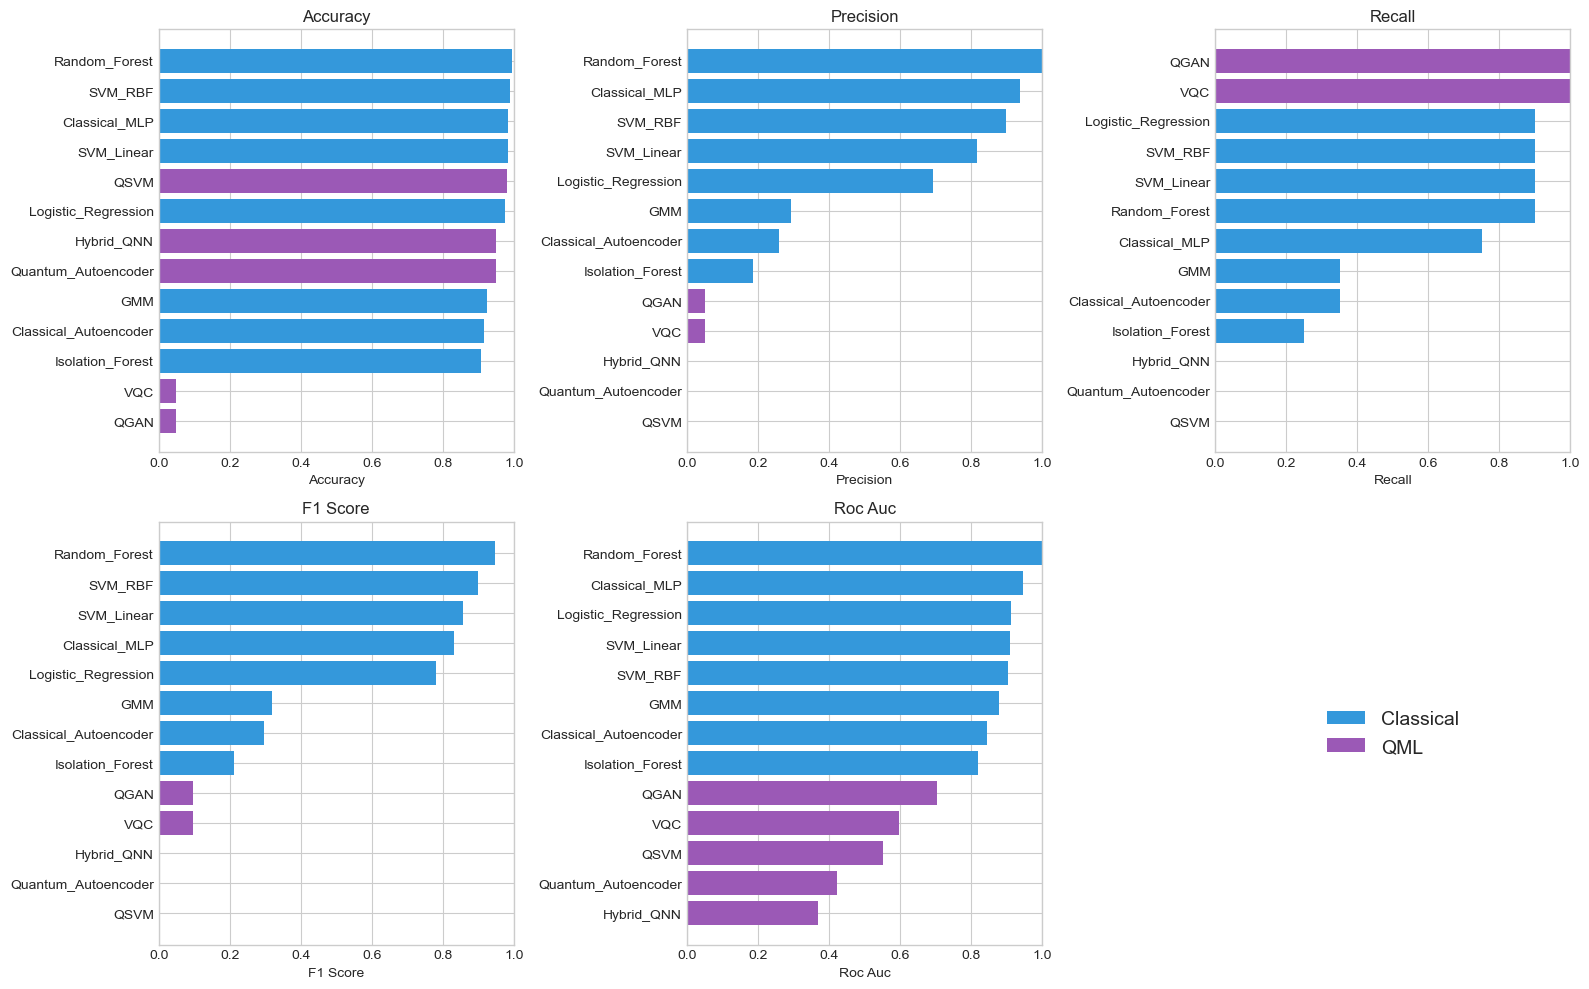

✅ Saved: classical_vs_qml_metrics.png


In [4]:
# Performance comparison
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    data = combined_df.sort_values(metric, ascending=True)
    colors_list = [colors['classical'] if c == 'Classical' else colors['qml'] 
                   for c in data['category']]
    
    ax.barh(data['model'], data[metric], color=colors_list)
    ax.set_xlabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()}')
    ax.set_xlim([0, 1])

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['classical'], label='Classical'),
                   Patch(facecolor=colors['qml'], label='QML')]
axes[-1].legend(handles=legend_elements, loc='center', fontsize=14)
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_qml_metrics.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_qml_metrics.png")

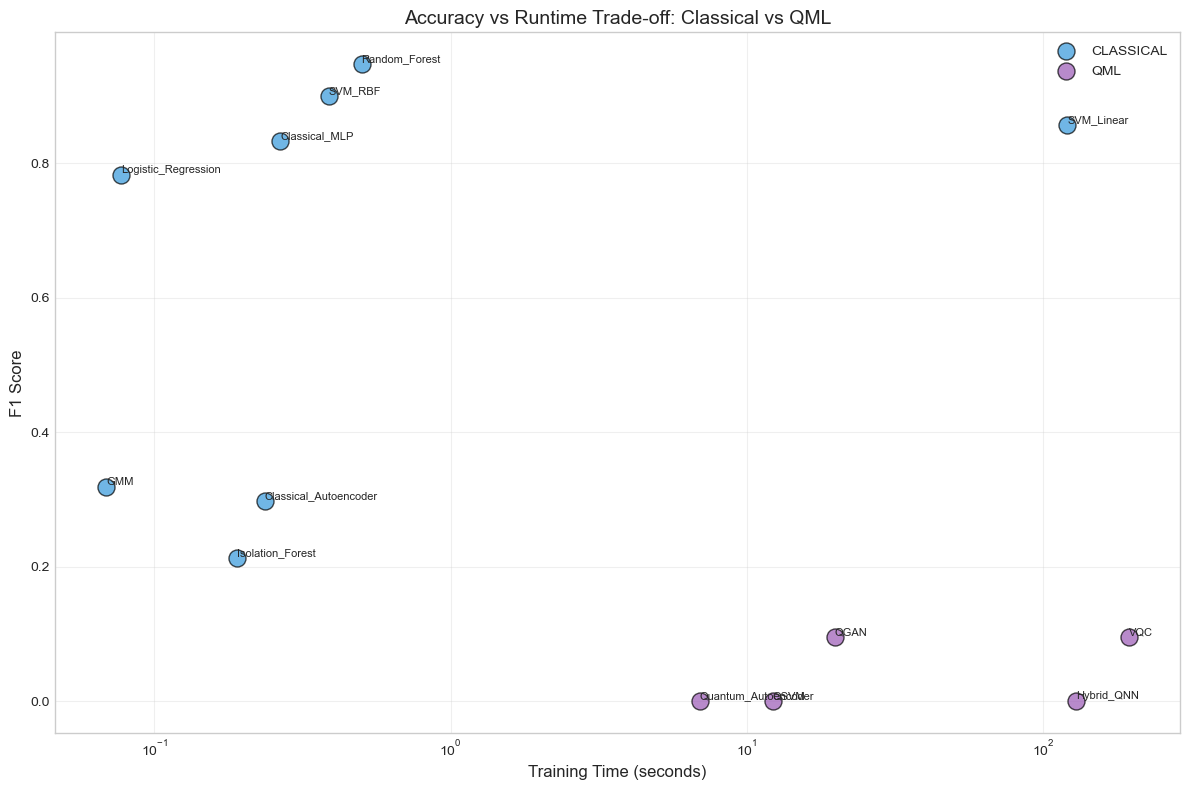

✅ Saved: classical_vs_qml_tradeoff.png


In [5]:
# Efficiency scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

for category, color in colors.items():
    data = classical_df if category == 'classical' else qml_df
    
    ax.scatter(data['train_time'], data['f1_score'], 
               c=color, label=category.upper(), s=150, alpha=0.7, edgecolors='black')
    
    for _, row in data.iterrows():
        ax.annotate(row['model'], (row['train_time'], row['f1_score']),
                   fontsize=8, ha='left', va='bottom')

ax.set_xlabel('Training Time (seconds)', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('Accuracy vs Runtime Trade-off: Classical vs QML', fontsize=14)
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_qml_tradeoff.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_qml_tradeoff.png")

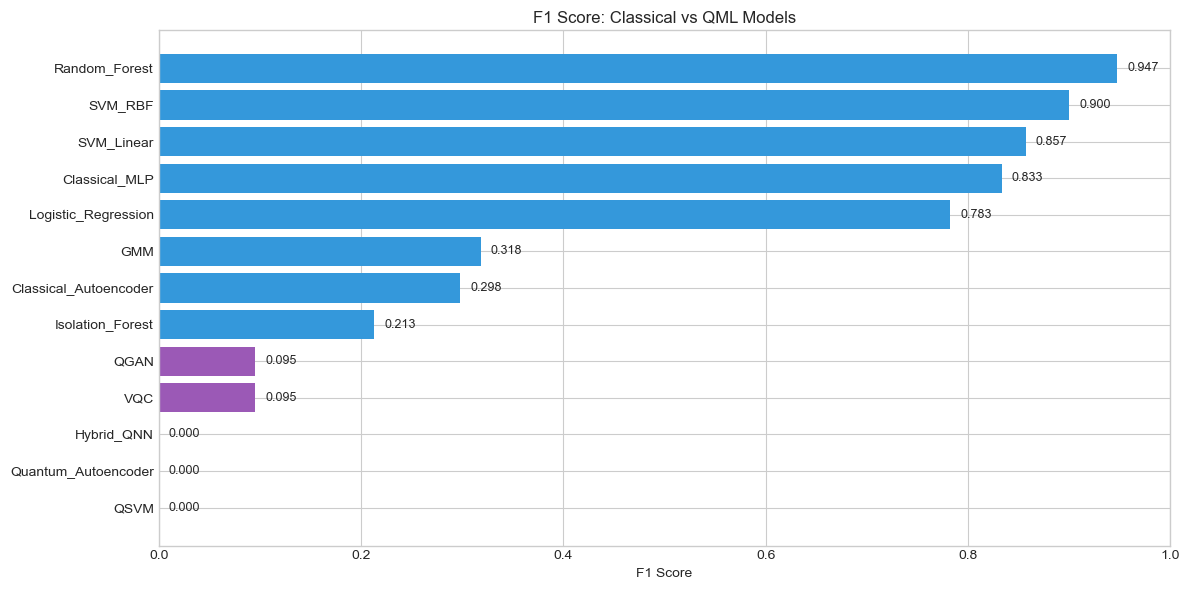

✅ Saved: classical_vs_qml_f1_score.png


In [6]:
# F1 Score comparison
fig, ax = plt.subplots(figsize=(12, 6))

data = combined_df.sort_values('f1_score', ascending=True)
colors_list = [colors['classical'] if c == 'Classical' else colors['qml'] 
               for c in data['category']]

bars = ax.barh(data['model'], data['f1_score'], color=colors_list)
ax.set_xlabel('F1 Score')
ax.set_title('F1 Score: Classical vs QML Models')
ax.set_xlim([0, 1])

for bar, val in zip(bars, data['f1_score']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'classical_vs_qml_f1_score.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: classical_vs_qml_f1_score.png")

In [7]:
# Best model per metric comparison
print("\n" + "="*70)
print("BEST MODEL PER METRIC: CLASSICAL VS QML")
print("="*70)

metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
best_results = []

for metric in metrics_to_compare:
    # Best classical
    best_classical_idx = classical_df[metric].idxmax()
    best_classical = classical_df.loc[best_classical_idx]
    
    # Best QML
    best_qml_idx = qml_df[metric].idxmax()
    best_qml = qml_df.loc[best_qml_idx]
    
    # Determine winner
    if best_classical[metric] > best_qml[metric]:
        winner = 'Classical'
        winner_model = best_classical['model']
    else:
        winner = 'QML'
        winner_model = best_qml['model']
    
    best_results.append({
        'Metric': metric.replace('_', ' ').title(),
        'Best Classical': f"{best_classical['model']} ({best_classical[metric]:.4f})",
        'Best QML': f"{best_qml['model']} ({best_qml[metric]:.4f})",
        'Winner': f"{winner}: {winner_model}"
    })
    
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"  Best Classical: {best_classical['model']} = {best_classical[metric]:.4f}")
    print(f"  Best QML: {best_qml['model']} = {best_qml[metric]:.4f}")
    print(f"  🏆 WINNER: {winner} ({winner_model})")

# Training time (lower is better)
print(f"\nTraining Time (lower is better):")
fastest_classical = classical_df.loc[classical_df['train_time'].idxmin()]
fastest_qml = qml_df.loc[qml_df['train_time'].idxmin()]

print(f"  Fastest Classical: {fastest_classical['model']} = {fastest_classical['train_time']:.4f}s")
print(f"  Fastest QML: {fastest_qml['model']} = {fastest_qml['train_time']:.4f}s")

if fastest_classical['train_time'] < fastest_qml['train_time']:
    print(f"  🏆 WINNER: Classical ({fastest_classical['model']})")
else:
    print(f"  🏆 WINNER: QML ({fastest_qml['model']})")


BEST MODEL PER METRIC: CLASSICAL VS QML

Accuracy:
  Best Classical: Random_Forest = 0.9950
  Best QML: QSVM = 0.9800
  🏆 WINNER: Classical (Random_Forest)

Precision:
  Best Classical: Random_Forest = 1.0000
  Best QML: VQC = 0.0500
  🏆 WINNER: Classical (Random_Forest)

Recall:
  Best Classical: SVM_Linear = 0.9000
  Best QML: VQC = 1.0000
  🏆 WINNER: QML (VQC)

F1 Score:
  Best Classical: Random_Forest = 0.9474
  Best QML: VQC = 0.0952
  🏆 WINNER: Classical (Random_Forest)

Roc Auc:
  Best Classical: Random_Forest = 0.9988
  Best QML: QGAN = 0.7053
  🏆 WINNER: Classical (Random_Forest)

Training Time (lower is better):
  Fastest Classical: GMM = 0.0688s
  Fastest QML: Quantum_Autoencoder = 6.9283s
  🏆 WINNER: Classical (GMM)


In [8]:
# Save summary
best_df = pd.DataFrame(best_results)
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
print(best_df.to_string(index=False))

best_df.to_csv(RESULTS_DIR / 'classical_vs_qml_best.csv', index=False)
print(f"\n✅ Saved: classical_vs_qml_best.csv")


SUMMARY TABLE
   Metric         Best Classical      Best QML                   Winner
 Accuracy Random_Forest (0.9950) QSVM (0.9800) Classical: Random_Forest
Precision Random_Forest (1.0000)  VQC (0.0500) Classical: Random_Forest
   Recall    SVM_Linear (0.9000)  VQC (1.0000)                 QML: VQC
 F1 Score Random_Forest (0.9474)  VQC (0.0952) Classical: Random_Forest
  Roc Auc Random_Forest (0.9988) QGAN (0.7053) Classical: Random_Forest

✅ Saved: classical_vs_qml_best.csv


In [9]:
# Overall best
print("\n" + "="*70)
print("OVERALL BEST MODELS")
print("="*70)

best_f1 = combined_df.loc[combined_df['f1_score'].idxmax()]
best_auc = combined_df.loc[combined_df['roc_auc'].idxmax()]

print(f"\n🥇 Best by F1: {best_f1['model']} ({best_f1['category']}) = {best_f1['f1_score']:.4f}")
print(f"🥇 Best by AUC: {best_auc['model']} ({best_auc['category']}) = {best_auc['roc_auc']:.4f}")

print("\n" + "-"*70)
print("KEY INSIGHT: Classical models are typically faster and competitive")
print("on small datasets. QML shows potential but requires more qubits")
print("and circuit depth for complex patterns.")
print("\n✅ Notebook 11 Complete!")


OVERALL BEST MODELS

🥇 Best by F1: Random_Forest (Classical) = 0.9474
🥇 Best by AUC: Random_Forest (Classical) = 0.9988

----------------------------------------------------------------------
KEY INSIGHT: Classical models are typically faster and competitive
on small datasets. QML shows potential but requires more qubits
and circuit depth for complex patterns.

✅ Notebook 11 Complete!
